# Analyse du dataset iris

Vous trouverez dans ce fichier une analyse du dataset iris, puis une exploitation de celui-ci ayant pour but de faire des prédicitions à partir de l'algorithme KNN

## Étape 1 : Analyse des données

On commence par importer les divers modules dont on aura besoin

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

On ouvre notre fichier contenant les données sur les iris.

In [4]:
df = pd.read_csv("IRIS.csv")

On regarde la taille de notre jeu de données. (Nombre de ligne, et nombre de colonnes)
On regarde ensuite quels sont les types de ces colonnes, et ce qu'elle contiennent.

In [5]:
df.shape

(150, 5)

Nous avons ici 150 lignes dans notre dataframe. C'est suffisant pour continuer à investiguer.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Regardons maintenant si des données sont manquantes. On commence par regarder s'il n'y a pas de NaN dans notre fichier (msno.matrix(df) s'occupe de cela et nous affiche le résultat sous forme d'un diagramme.)

<AxesSubplot:>

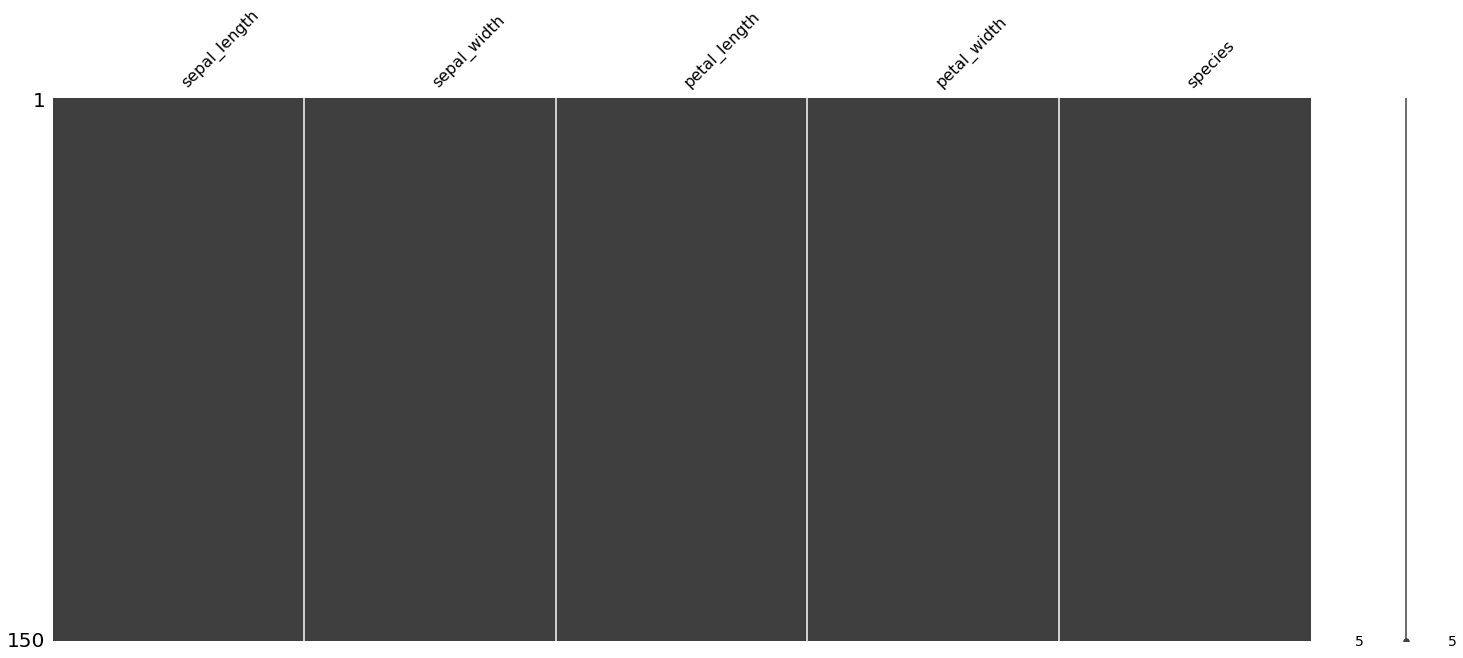

In [7]:
msno.matrix(df)

Regardons maintenant les informations générales sur notre dataframe. On recherche des valeurs bizarres tels qu'un minimum à -1 alors que nous avons des tailles et que ça ne peut donc pas être des nombres négatifs.

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Regardons maintenant les statistiques de notre dataframe, mais regroupées par espèce

In [9]:
df.groupby("species").describe()

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width                                                \
                      count   mean       std  min    25%  50%    75%  max   
species                                                                     
Iris-setosa            50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4   
Iris-versicolor        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
Iris-virginica         50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

                petal_length                                               \
                       count   mean       std  min  25%   50%    75%  max   
species                                                                     
Iris-setosa             50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9   
Iris-versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
Iris-virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

                petal_width                                            
                      count   mean       std  min  25%  50%  75%  max  
species                                                                
Iris-setosa            50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor        50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica         50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

On remarque que nous avons autant d'échantillons de chaque espèce. On observe aussi des différences entre les statistiques en fonction de nos espèces. Regardons ça de plus près à l'aide de graphiques.

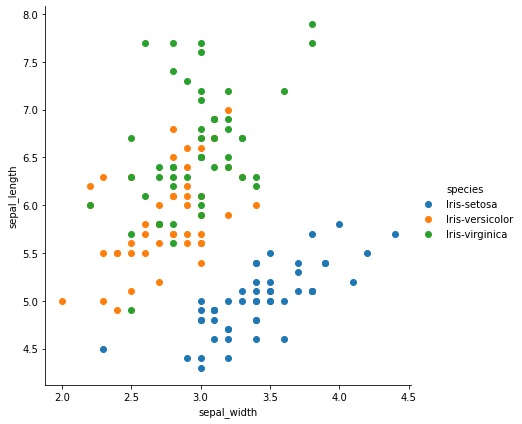

In [10]:
sns.FacetGrid(df, hue="species", height=6).map(plt.scatter, "sepal_width", "sepal_length").add_legend()

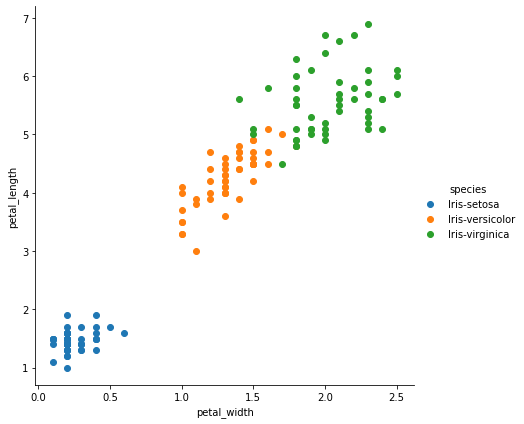

In [11]:
sns.FacetGrid(df, hue="species", height=6).map(plt.scatter, "petal_width", "petal_length").add_legend()

Dans le premier graphique, nous voyons que les iris setosa sont bien séparés du reste. Cepandant, les iris versicolor et virginica sont très proches, ce qui rend difficile l'exploitation si nous n'avons que l'information de la largeur et hauteur du sépal. Cepndant, avec le second graphique, nous pouvons distinguer bien plus distinctement les différentes zones. Nous pouvons donc exploiter l'algorithme KNN !

## Étape 2 : implémentation de l'algorithme KNN.

Commençons par séparer nos features (X) de notre target (y)

In [12]:
X = df.drop("species", axis=1)
y = df["species"]

On découpe ensuite notre dataframe en données d'entrainement et données de test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6752)

On crée une instance de la classe implémentant le KNN dans sklearn, puis on entraine notre modèle.

In [14]:
knn = KNeighborsClassifier(n_neighbors=12)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

Nous pouvons maintenant tester notre modèle :

In [16]:
knn.score(X_test, y_test)

/Users/antoinemeresse/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9666666666666667